In [52]:
import pathlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
#set paths for file navigation
BASE_DIR = pathlib.Path().resolve().parent
DATA_DIR = BASE_DIR / 'data'

In [54]:
nonzero_earners = DATA_DIR / 'processed/non-zero earners.csv'

In [55]:
df_nonzero_earners = pd.read_csv(nonzero_earners)
df_nonzero_earners.head(5)

,organization_id,organization_owner_id,total_revenue_2021,revenue_realized_to_date_usd,time_entries_count,billable_time_entries_count,hours_tracked,billable_hours_tracked,clients_used,projects_used,billable_projects_used,country,industry,company_type,approximate_employees,reported_annual_revenue
0,4371248,3823892,79612.9,186161.4,2720337,1146268,5.261245e+06,2.655264e+06,184,1243,981,Poland,Internet Software & Services,private,NaN,NaN
1,4321223,2261811,74800.0,170629.0,359584,343625,9.334017e+05,9.007908e+05,999,1740,1717,United States,Internet Software & Services,private,45.0,NaN
2,4974044,6531377,58441.5,74400.3,214387,80644,4.892082e+05,1.117092e+05,1243,2521,2516,United Kingdom,NaN,NaN,NaN,NaN
3,3421574,4123264,35838.0,131010.6,1277234,930451,1.129270e+06,9.007524e+05,16,43,36,United States,Internet Software & Services,public,1500.0,2.482000e+08
4,4050064,5264562,33076.8,61776.8,232052,163,2.710665e+05,1.149547e+02,0,559,5,United States,Internet Software & Services,public,100030.0,1.113900e+10


In [56]:
#get all the categorical variables
cat_vars = [var for var in df_nonzero_earners.columns if df_nonzero_earners[var].dtype == 'O']

#we have to add org_id and org_owner_id as they are also categorical
cat_vars = cat_vars + ['organization_id','organization_owner_id']

#cast all categorical variables to dtype object
df_nonzero_earners[cat_vars] = df_nonzero_earners[cat_vars].astype('O')

I want to see how many missing values we have for the PII columns in order to gauge how useful they will be. 

In [57]:
#make a list of vars with values
vars_with_na = [var for var in df_nonzero_earners.columns if df_nonzero_earners[var].isnull().sum() > 0]

In [58]:
df_nonzero_earners[vars_with_na].isnull().mean().sort_values(ascending=False)

reported_annual_revenue    0.987469
approximate_employees      0.717366
industry                   0.674838
company_type               0.543203
country                    0.001350
dtype: float64

Looks like the country is the most populated column. But we can try to glean something from company type and industry.

In [59]:
sns.set_theme(style='darkgrid', palette='colorblind')

<AxesSubplot:>

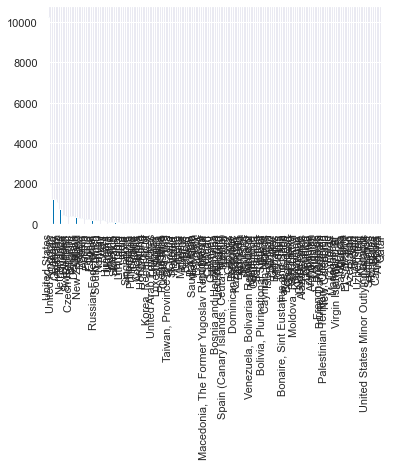

In [60]:
df_nonzero_earners['country'].value_counts().plot(kind='bar')

I need to lump some of the lower frequency countries into one category. I can do this by finding out the percentiles for this column.

In [61]:
df_nonzero_earners['country'].value_counts().describe()

count      146.000000
mean       162.123288
std        878.465432
min          1.000000
25%          2.000000
50%          6.000000
75%         50.750000
max      10273.000000
Name: country, dtype: float64

In [62]:
df_nonzero_earners['country'].value_counts(dropna=False)

United States     10273
United Kingdom     1946
Canada             1219
Germany            1202
Australia          1064
                  ...  
Seychelles            1
Honduras              1
Belize                1
Uganda                1
Qatar                 1
Name: country, Length: 147, dtype: int64

In [63]:
#lump countries with less than 30 orgs into "Others"
df_nonzero_earners['country_cleaned'] = df_nonzero_earners['country'].mask(df_nonzero_earners['country'].map(df_nonzero_earners['country'].value_counts()).lt(30), 'Others')

Text(0, 0.5, 'Count')

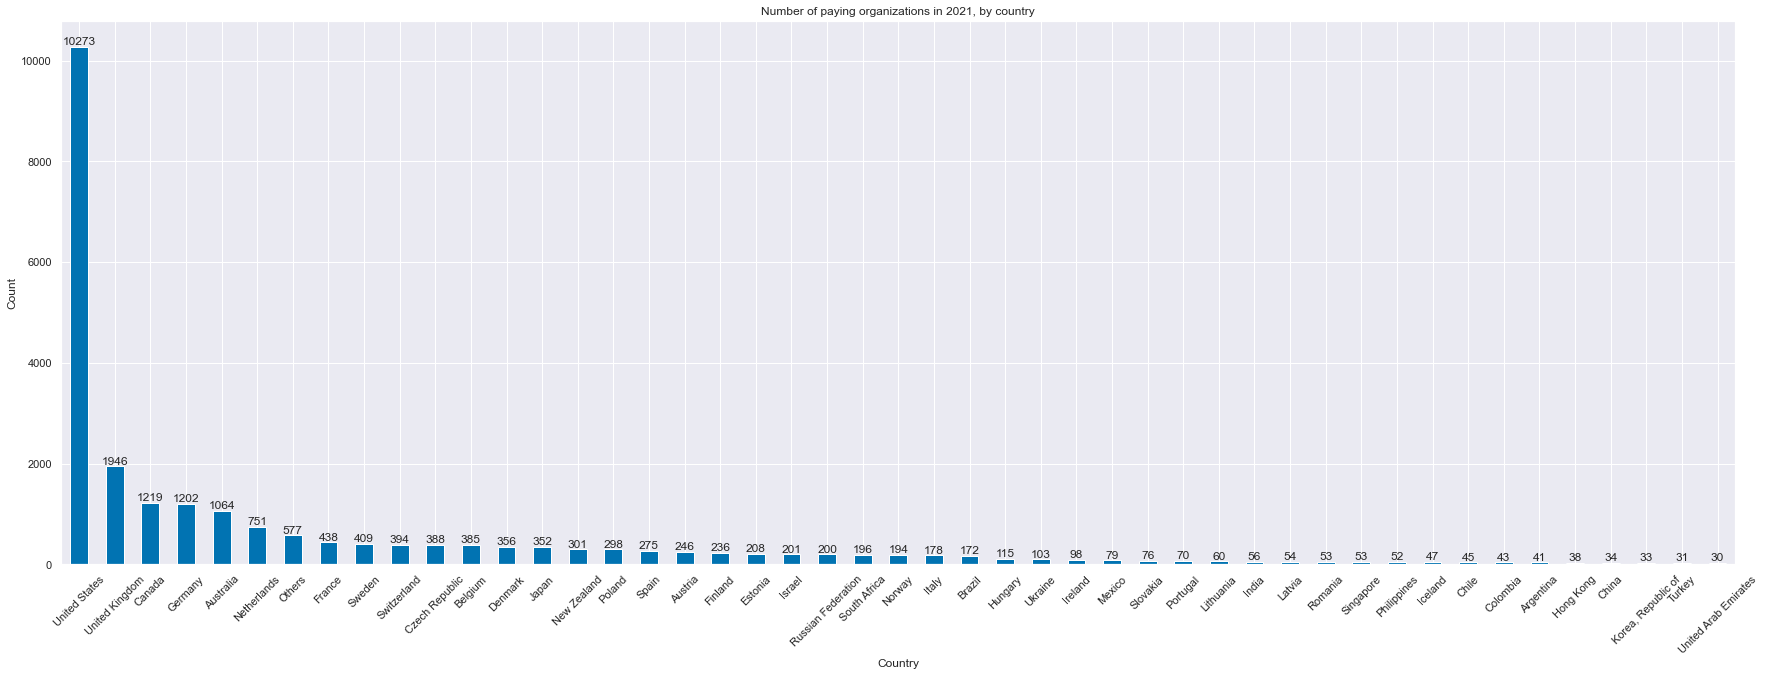

In [64]:
plt.figure(figsize=(30, 10))
fig = df_nonzero_earners['country_cleaned'].value_counts().plot(kind='bar')
fig.bar_label(fig.containers[0])
plt.title('Number of paying organizations in 2021, by country')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylabel('Count')

In [65]:
df_nonzero_earners['industry'] = df_nonzero_earners['industry'].mask(df_nonzero_earners['industry'].map(df_nonzero_earners['industry'].value_counts()).lt(10), 'Others')

Text(0, 0.5, 'Count')

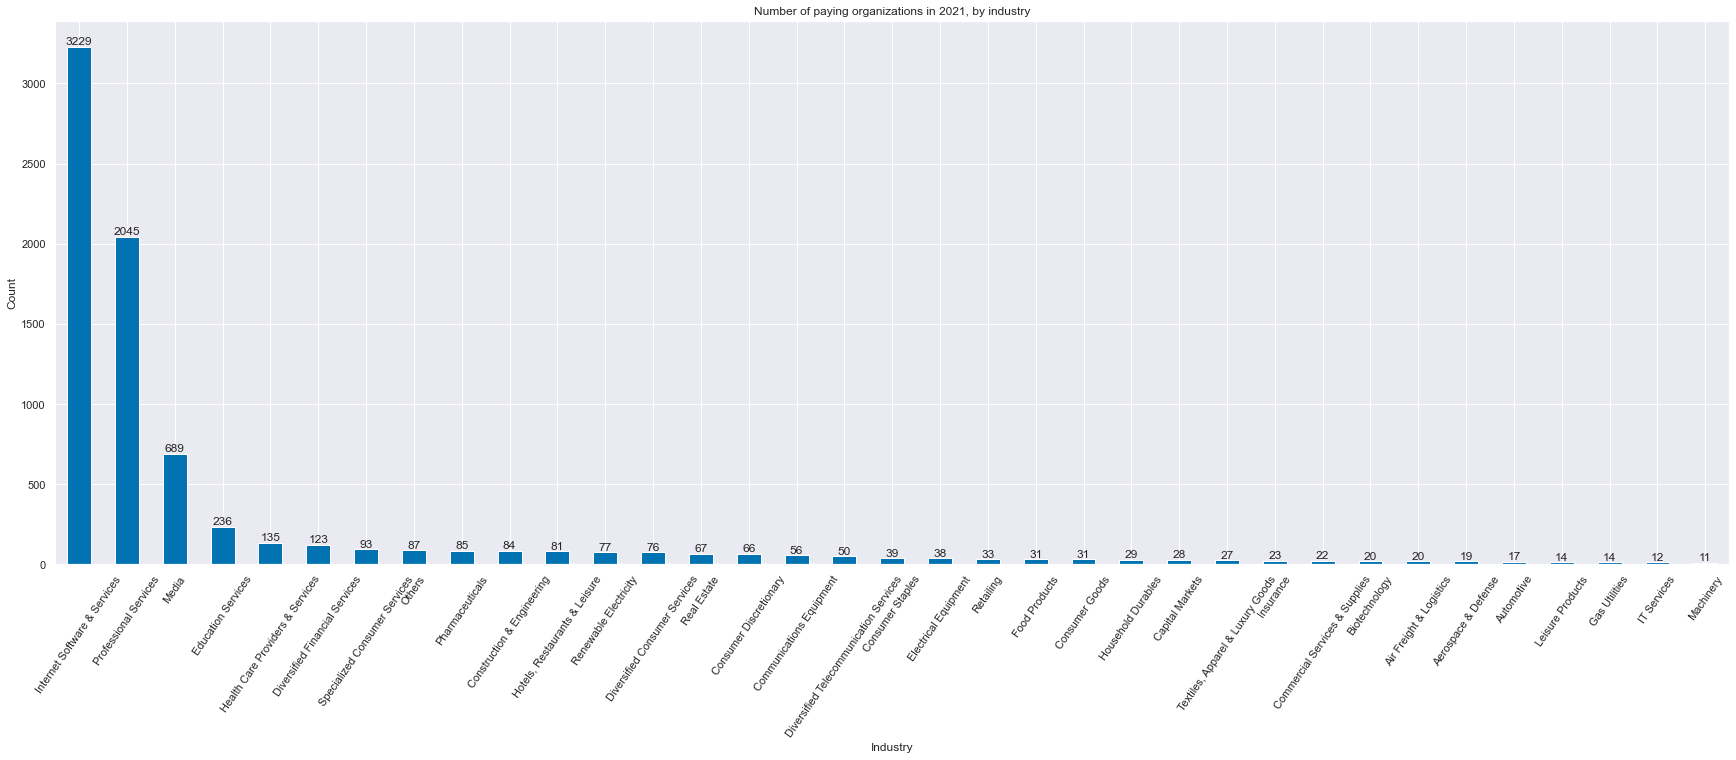

In [66]:
plt.figure(figsize=(30, 10))
fig = df_nonzero_earners['industry'].value_counts().plot(kind='bar')
fig.bar_label(fig.containers[0])
plt.title('Number of paying organizations in 2021, by industry')
plt.xlabel('Industry')
plt.xticks(rotation=55)
plt.ylabel('Count')

Any correlation between number of clients the org has and revenue? I would expect a positive correlation.

<AxesSubplot:xlabel='total_revenue_2021', ylabel='clients_used'>

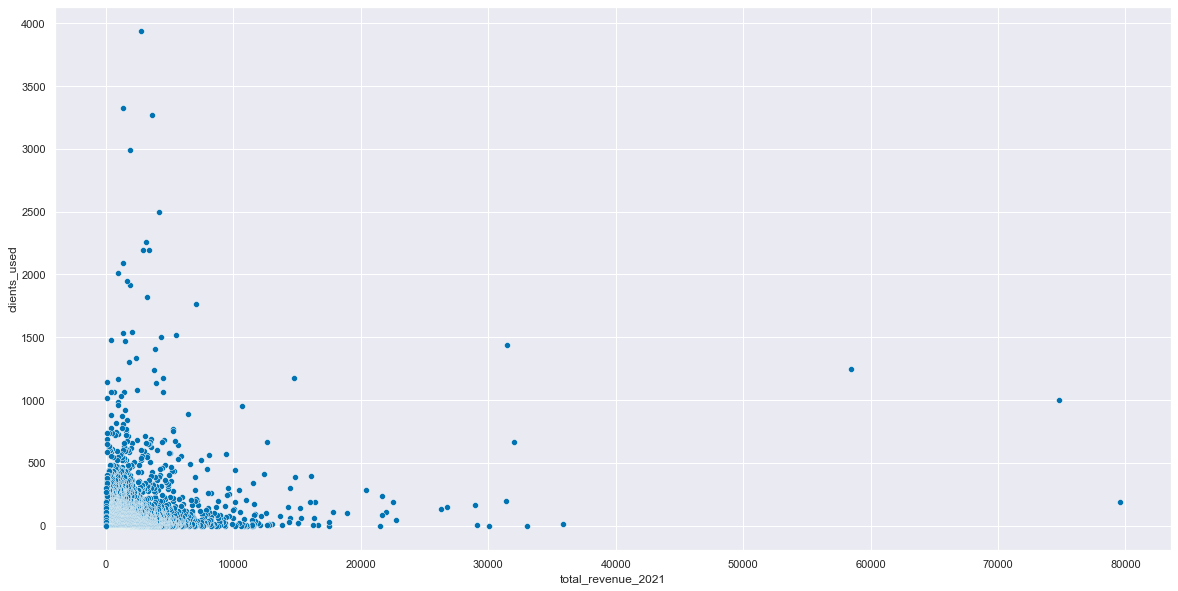

In [67]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df_nonzero_earners, x='total_revenue_2021', y='clients_used')

What about projects? Any correlation with revenue?

<AxesSubplot:xlabel='total_revenue_2021', ylabel='projects_used'>

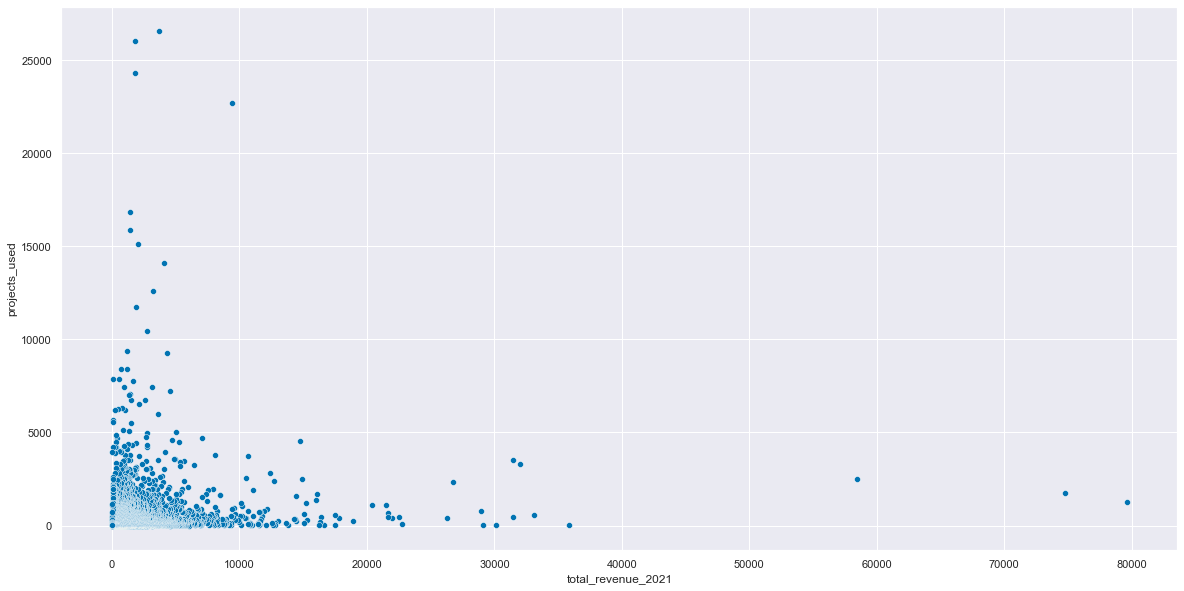

In [68]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df_nonzero_earners, x='total_revenue_2021', y='projects_used')